In [42]:
from openai import OpenAI
import os
import requests
from IPython.display import Image, display
import random
import string

client = OpenAI(
    api_key=os.environ.get("OPENAI_KEY"),  # This is the default and can be omitted
)

def save_image_from_url(image_url, prompt):
    # Generate filename from prompt
    local_filename = f"saved_images/{prompt.replace(' ', '_')}.png"
    response = requests.get(image_url)
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    print(f"Image saved as {local_filename}")
    return local_filename


def askGPT(systemPrompt, userPrompt):
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",  # Use GPT-4 if available: "gpt-4"
            messages=[
                {"role": "system", "content": systemPrompt},
                {"role": "user", "content": userPrompt}
            ],
            # max_tokens=150,
            temperature=0.7  # Controls creativity
        )
        response = response.choices[0].message.content.strip()
        return response

    except Exception as e:
        print("ERROR: ", e)
        return None
    


In [59]:
def construct_image_prompt(hobby:str, topic:str, analogy:str, concept_breakdown:str):
    text = f"""
    * Instructions:
    You are teaching adults data science by relating it to their hobby. 
    Generate explanatory image for given text
    The image has to include the analogy provided and be not too crowded (minimalism is ideal).
    Focus on specific, visually representable elements and avoid typography.
    Have no more than 5 objects in the image.
    Hoby:
    {hobby}
    * Data science topic:
    {topic}
    * Analogy:
    {analogy}
    {concept_breakdown}
    * Generate this image. Remove any text.
"""
    return text

hobby = "Fishing"
topic = "Standard deviation"
analogy = "Standard deviation can be understood as variation in fish size"
concept_breakdown = "Standard deviation measures the amount of variation or dispersion of a set of values. In fishing, if the fish sizes are close to the average size, the standard deviation is low. If the fish sizes vary greatly, the standard deviation is high."


first_prompt =construct_image_prompt(hobby, topic, analogy, concept_breakdown)

print(first_prompt)


    * Instructions:
    You are teaching adults data science by relating it to their hobby. 
    Generate explanatory image for given text
    The image has to include the analogy provided and be not too crowded (minimalism is ideal).
    Focus on specific, visually representable elements and avoid typography.
    Have no more than 5 objects in the image.
    Hoby:
    Fishing
    * Data science topic:
    Standard deviation
    * Analogy:
    Standard deviation can be understood as variation in fish size
    Standard deviation measures the amount of variation or dispersion of a set of values. In fishing, if the fish sizes are close to the average size, the standard deviation is low. If the fish sizes vary greatly, the standard deviation is high.
    * Generate this image



Image saved as saved_images/RREUlpbhYKjY.png


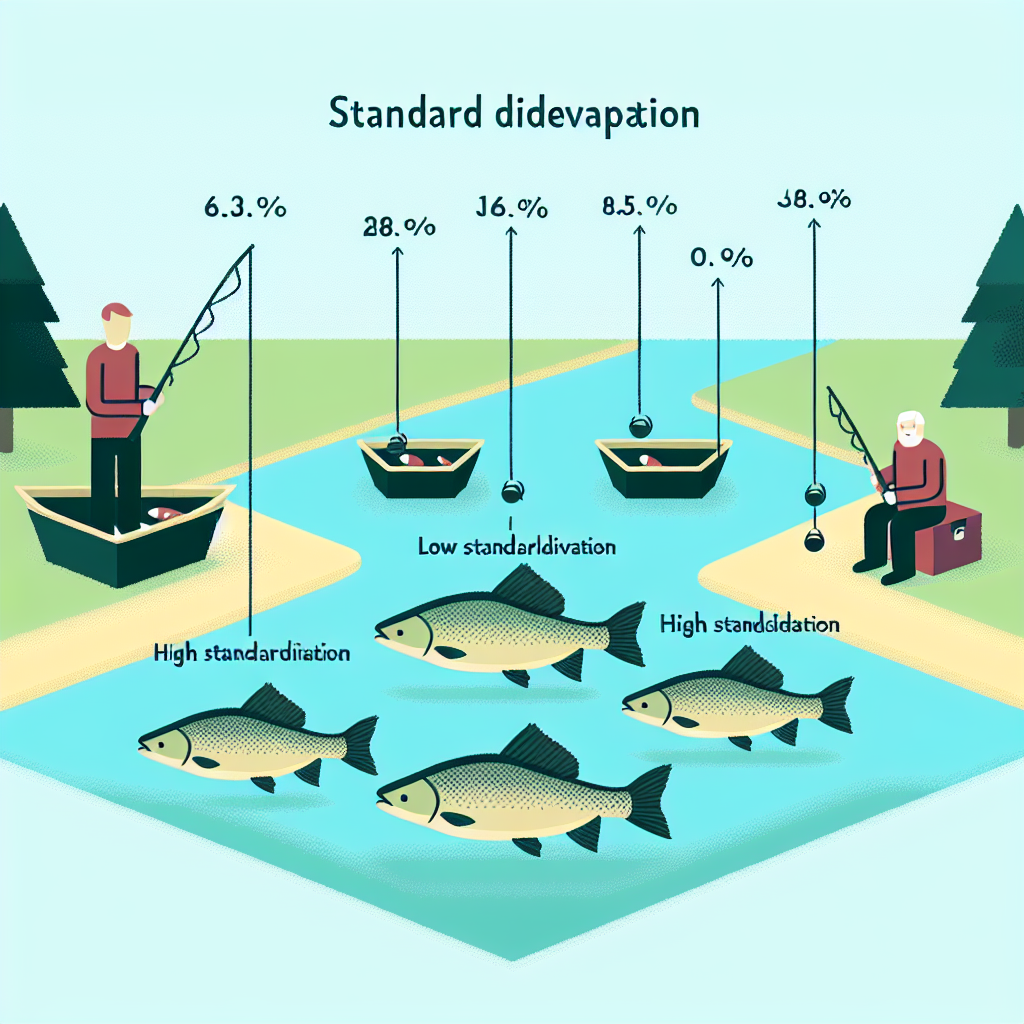

In [60]:
def generate_image(prompt, size="1024x1024"):
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size=size,
        #quality="s",
        style = 'vivid',
        n=1,
    )
    return response.data[0].url

prompt = first_prompt
image_url = generate_image(first_prompt)

def generate_random_key(length=12):
    """Generates """
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for _ in range(length))

local_filename = save_image_from_url(image_url, generate_random_key())

# Display the saved image
display(Image(filename=local_filename))